In [32]:
import pandas as pd

#read file and visualise it

data = pd.read_csv('dataset.csv', nrows=300000)

In [33]:
print(data)

        app_id                    app_name  \
0           10              Counter-Strike   
1           10              Counter-Strike   
2           10              Counter-Strike   
3           10              Counter-Strike   
4           10              Counter-Strike   
...        ...                         ...   
299995   12200  Bully: Scholarship Edition   
299996   12200  Bully: Scholarship Edition   
299997   12200  Bully: Scholarship Edition   
299998   12200  Bully: Scholarship Edition   
299999   12200  Bully: Scholarship Edition   

                                              review_text  review_score  \
0                                         Ruined my life.             1   
1       This will be more of a ''my experience with th...             1   
2                           This game saved my virginity.             1   
3       • Do you like original games? • Do you like ga...             1   
4                Easy to learn, hard to master.                       1 

In [34]:
#Clean the data:
import re
#Remove duplicates, null values, and irrelevant information.
#Handle noisy data (e.g., special characters, HTML tags).
data.drop_duplicates()
#print(data['review_text'])

for review in data['review_text']:
    review = re.sub('[^A-Za-z0-9]+',' ', str(review) ).lower()



In [35]:
data['review_text'].dropna(inplace=True)

#Text preprocessing:
import nltk
from nltk.tokenize import word_tokenize
#nltk.download('punkt')
#Tokenization, lowercasing, removing stopwords, stemming, and lemmatization.
text = data['review_text'].str.lower().astype('str')

text = text.apply(word_tokenize)
text.head()

0                                [ruined, my, life, .]
1    [this, will, be, more, of, a, ``, my, experien...
2                [this, game, saved, my, virginity, .]
3    [•, do, you, like, original, games, ?, •, do, ...
4            [easy, to, learn, ,, hard, to, master, .]
Name: review_text, dtype: object

In [47]:
#nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
filtered_sentences = []
for texts in text:
    filtered_sentence = []
    for word in texts:
        if word not in stop_words:
            filtered_sentence.append(word.replace('$',''))
    filtered_sentences.append(filtered_sentence)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bobby\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
#stem words
#print(filtered_sentences[0])
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmed_sentences = []

for stentences in filtered_sentences:
    stemmed_sentence = " "
    for word in stentences:
        stemmed_sentence += " " + stemmer.stem(word)
    stemmed_sentences.append(stemmed_sentence)

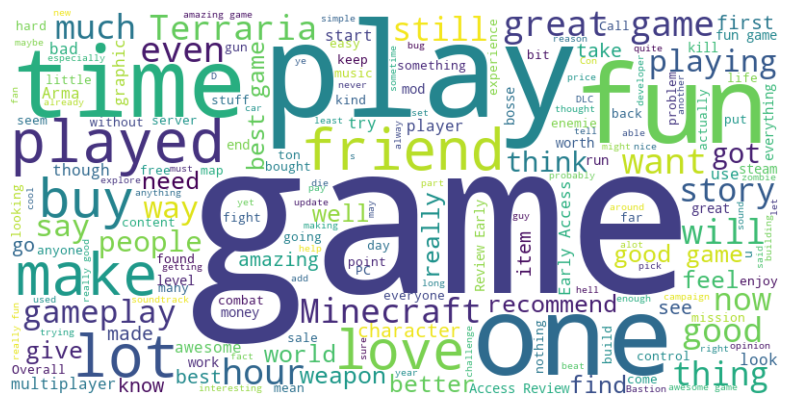

In [49]:
#print(stemmed_sentences[0])
#We already have the labels -1 = negative 0 = neutral 1 = positive

#Now to do exploratory data analysis 
data["processed_reviews"] = stemmed_sentences

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate("+".join(data['processed_reviews'].astype('str')))

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.show()

In [ ]:
#histogram of popular words 
import seaborn as sns
data = data[data['processed_reviews'].notna()]
sns.histplot(data['processed_reviews'])


<AxesSubplot:xlabel='processed_reviews', ylabel='Count'>

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 65281 (\N{FULLWIDTH EXCLAMATION MARK}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 43906 (\N{CHEROKEE

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 65439 (\N{HALFWIDTH KATAKANA SEMI-VOICED SOUND MARK}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9428 (\N{CIRCLED LATIN SMALL LETTER E}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9439 (\N{CIRCLED LATIN SMALL LETTER P}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: 

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 36229 (\N{CJK UNIFIED IDEOGRAPH-8D85}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128153 (\N{BLUE HEART}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 853 (\N{COMBINING RIGHT ARROWHEAD BELOW}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 4448 (\N{H

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 3612 (\N{THAI CHARACTER PHO PHUNG}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 3588 (\N{THAI CHARACTER KHO KHWAI}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 3609 (\N{TH

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128125 (\N{EXTRATERRESTRIAL ALIEN}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 3232 (\N{KANNADA LETTER TTHA}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Matplotlib currently does not support Kannada natively.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128058 (\N{WOLF FACE}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 65099 (\N{WAVY OVERLINE}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 65083 (\N{PRESENTATION FORM FOR VERTICAL LEFT BLACK LENTICULAR BRACKET}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning:

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 36523 (\N{CJK UNIFIED IDEOGRAPH-8EAB}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyp

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 917505 (\N{LANGUAGE TAG}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 127365 (\N{NEGATIVE SQUARED LATIN CAPITAL LETTER V}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 127344 (\N{NEGATIVE SQUARED LATIN CAPITAL LETTER A}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: Us

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 3237 (\N{KANNADA LETTER THA}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 65303 (\N{FULLWIDTH DIGIT SEVEN}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12376 (\N{HI

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 33936 (\N{CJK UNIFIED IDEOGRAPH-8490}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 30294 (\N{CJK UNIFIED IDEOGRAPH-7656}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyp

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 27888 (\N{CJK UNIFIED IDEOGRAPH-6CF0}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 25289 (\N{CJK UNIFIED IDEOGRAPH-62C9}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 29790 (\N{CJK UNIFIED IDEOGRAPH-745E}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyp

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 53944 (\N{HANGUL SYL

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12409 (\N{HIRAGANA LETTER BE}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12358 (\N{HIRAGANA LETTER U}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12385 (\N{HIRAGANA LETTER TI}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128293 (\N{FIRE}) missi

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 21863 (\N{CJK UNIFIED IDEOGRAPH-5567}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128317 (\N{DOWN-POINTING SMALL RED TRIANGLE}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 4444 (\N{HANGUL CHOSEONG NIEUN-CIEUC}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarnin

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12293 (\N{IDEOGRAPHIC ITERATION MARK}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12399 (\N{HIRAGANA LETTER HA}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 37197 

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12532 (\N{KATAKANA LETTER VU}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 24656 (\N{CJK UNIFIED IDEOGRAPH-6050}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 24598 (\N{CJK UNIFIED IDEOGRAPH-6016}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 25551 

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 4447 (\N{HANGUL CHOSEONG FILLER}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 10071 (\N{HEAVY EXCLAMATION MARK SYMBOL}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52828 (\N{HANGUL SYLLABLE CIN}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50528 (

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 65357 (\N{FULLWIDTH LATIN SMALL LETTER M}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 65298 (\N{FULLWIDTH DIGIT TWO}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 65296 (\N{FULLWIDTH DIGIT ZERO}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47476 (

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 40657 (\N{CJK UNIFIED IDEOGRAPH-9ED1}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26263 (\N{CJK UNIFIED IDEOGRAPH-6697}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 24093 (\N{CJK UNIFIED IDEOGRAPH-5E1D}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyp

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 35841 (\N{CJK UNIFIED IDEOGRAPH-8C01}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20667 (\N{CJK UNIFIED IDEOGRAPH-50BB}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 36924 (\N{CJK UNIFIED IDEOGRAPH-903C}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyp

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 22519 (\N{CJK UNIFIED IDEOGRAPH-57F7}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20505 (\N{CJK UNIFIED IDEOGRAPH-5019}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 30070 (\N{CJK UNIFIED IDEOGRAPH-7576}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyp

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 65342 (\N{FULLWIDTH CIRCUMFLEX ACCENT}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 65285 (\N{FULLWIDTH PERCENT SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 65504 (\N{FULLWIDTH CENT SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 5597 (\N

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x00000227FAF428B8> (for post_execute):


KeyboardInterrupt: 

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65281 (\N{FULLWIDTH EXCLAMATION MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-pack

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65439 (\N{HALFWIDTH KATAKANA SEMI-VOICED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9428 (\N{CIRCLED LATIN SMALL LETTER E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9439 (\N{CIRCLED LATIN SMALL LETTER P}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCa

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36229 (\N{CJK UNIFIED IDEOGRAPH-8D85}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128153 (\N{BLUE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 853 (\N{COMBINING RIGHT ARROWHEAD BELOW}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\s

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3612 (\N{THAI CHARACTER PHO PHUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3588 (\N{THAI CHARACTER KHO KHWAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\si

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128125 (\N{EXTRATERRESTRIAL ALIEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3232 (\N{KANNADA LETTER TTHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Matplotlib currently does not support Kannada natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IP

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128058 (\N{WOLF FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65099 (\N{WAVY OVERLINE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65083 (\N{PRESENTATION FORM FOR VERTICAL LEFT BLACK LENTICULAR BRACKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-pa

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3854 (\N{TIBETAN MARK NYIS SHAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12619 (\N{HANGUL LETTER KHIEUKH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-pa

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3900 (\N{TIBETAN MARK ANG KHANG GYON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3901 (\N{TIBETAN MARK ANG KHANG GYAS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12644 (\N{HANGUL FILLER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\si

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65509 (\N{FULLWIDTH YEN SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12304 (\N{LEFT BLACK LENTICULAR BRACKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12305 (\N{RIGHT BLACK LENTICULAR BRACKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packag

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 33936 (\N{CJK UNIFIED IDEOGRAPH-8490}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30294 (\N{CJK UNIFIED IDEOGRAPH-7656}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-package

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27888 (\N{CJK UNIFIED IDEOGRAPH-6CF0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packag

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65290 (\N{FULLWIDTH ASTERISK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65312 (\N{FULLWIDTH COMMERCIAL AT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21430 (\N{CJK UNIFIED IDEOGRAPH-53B6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packag

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12409 (\N{HIRAGANA LETTER BE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12358 (\N{HIRAGANA LETTER U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12385 (\N{HIRAGANA LETTER TI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\

C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9459 (\N{NEGATIVE CIRCLED NUMBER NINETEEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9455 (\N{NEGATIVE CIRCLED NUMBER FIFTEEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-p